In [11]:
# https://geostat-framework.readthedocs.io/projects/gstools/en/v1.1.1/tutorial_03_vario.html#the-data

In [12]:
!pip install gstools

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Parameters
slice_index = 18  # Hardcoded slice index


In [15]:
# Load .npz file
uploaded_file = "/home/mariopasc/Python/Datasets/Meningiomas/npz/P15/P15_T1.npz"  # Update this path
data = np.load(uploaded_file)
# slice_data = np.asarray(np.squeeze(data['data'][0,:,:,slice_index]),dtype=np.float64)  # Extract hardcoded slice
slice_data = np.squeeze(data['data'][0,0:127,0:127,slice_index])  # Extract hardcoded slice
n, m = slice_data.shape


In [16]:
# phase_data = np.random.uniform(0, 2*np.pi, size=slice_data.shape)

x = np.linspace(-5, 5, n)
y = np.linspace(-5, 5, m)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)
phase_data = np.sqrt(xx**2 + yy**2)

slice_data_real = slice_data * np.cos(phase_data)
slice_data_imag = slice_data * np.sin(phase_data)

In [ ]:

# create a structured grid on which the data is defined
x_s = np.arange(0, n)
y_s = np.arange(0, m)


x_u, y_u = np.meshgrid(x_s, y_s)
len_unstruct = len(x_s) * len(y_s)
x_u = np.reshape(x_u, len_unstruct)
y_u = np.reshape(y_u, len_unstruct)

In [18]:
from gstools import vario_estimate_unstructured

bins = np.linspace(0, 10, 50)
print('Estimating unstructured variogram')
bin_center, gamma = vario_estimate_unstructured(
    (x_u, y_u),
    slice_data_real.flatten(),
    bins,
    sampling_size=2000,
    sampling_seed=19920516,
    )

Estimating unstructured variogram


In [19]:
# https://geostat-framework.readthedocs.io/projects/gstools/en/v1.1.1/tutorial_02_cov.html#provided-covariance-models
from gstools import Exponential, Gaussian, Stable, Matern, Rational, TPLExponential

# fit a covariance model
#fit_model = Matern(dim=2, var=1, len_scale=10)
#fit_model = Rational(dim=2, var=1, len_scale=10)
fit_model = TPLExponential(dim=2, var=1, len_scale=10)
fit_model.fit_variogram(bin_center, gamma, nugget=True)

({'var': np.float64(29.088990270679243),
  'len_scale': np.float64(0.05054140894366484),
  'nugget': np.float64(1.4821312064759195e-18),
  'hurst': np.float64(0.12624103884463814),
  'len_low': np.float64(546.128836771236)},
 array([[ 1.67760721e+03, -6.97260086e-01, -1.43876321e-02,
         -3.47176291e+01,  3.16925045e+04],
        [-6.97260086e-01,  3.79128244e+00, -2.33454848e-03,
         -5.54686006e-01, -2.53614368e+01],
        [-1.43876321e-02, -2.33454848e-03,  2.11515929e-03,
         -1.33121486e-02,  3.05007373e+00],
        [-3.47176291e+01, -5.54686006e-01, -1.33121486e-02,
          2.43732973e+00, -6.76011695e+02],
        [ 3.16925045e+04, -2.53614368e+01,  3.05007373e+00,
         -6.76011695e+02,  6.05654161e+05]]))

/home/mariopasc/Python/misc/miniconda3/envs/meningiomas/lib/python3.9/site-packages/gstools/covmodel/plot.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


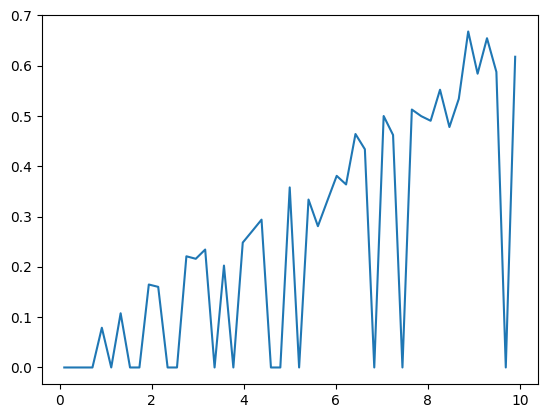

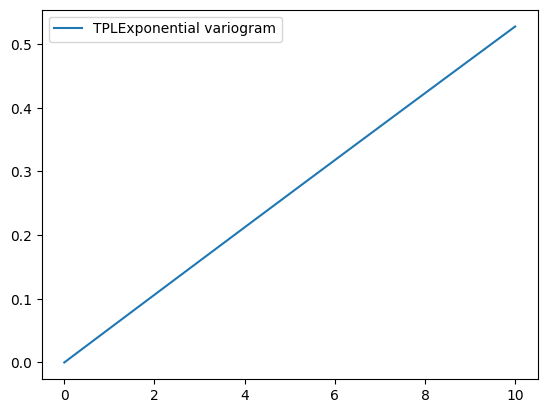

In [20]:
from gstools.covmodel.plot import plot_variogram
plt.plot(bin_center, gamma)
plot_variogram(fit_model, x_max=bins[-1])
plt.show()

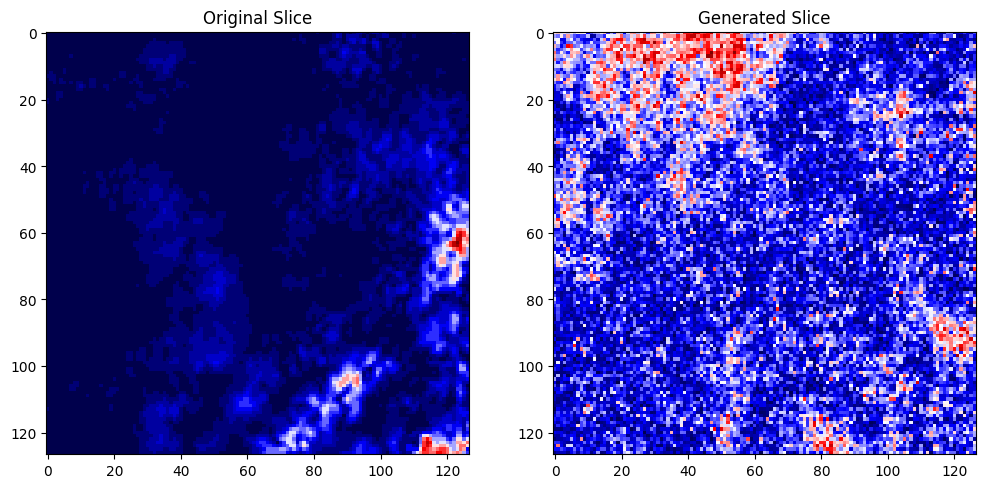

In [21]:
from gstools import SRF

srf_real = SRF(fit_model, seed=19770928)
new_data_real = srf_real((x_s, y_s), mesh_type='structured')

srf_imag = SRF(fit_model, seed=19773022)
new_data_imag = srf_imag((x_s, y_s), mesh_type='structured')

new_data = np.sqrt(new_data_real**2+new_data_imag**2)

#plt.imshow(new_herten.T, origin='lower')
#plt.show()

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Slice")
plt.imshow(slice_data, cmap='seismic')
plt.subplot(1, 2, 2)
plt.title("Generated Slice")
plt.imshow(new_data, cmap='seismic')



In [22]:
print(slice_data.mean())
print(new_data.mean())

0.9242978485956972
4.465131395084775


In [23]:
print(slice_data.std())
print(new_data.std())

1.6608867248622998
2.3705550371436024
